In [ ]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [ ]:
# Load the dataset
reddit_combo = pd.read_csv('/content/Reddit_Combi.csv')

In [ ]:
reddit_combo.head() # printing the first five rows of the dataset

,title,body,Body_Title,label
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. Next year my contract is finish. But, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. Why this country is so good. I can afford anything i want here. Why can't we just have equality in currency exchange? I I need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. Yes, that's right, it's saving money, not spending money. And yes, im going to be a rich person in such young age If I think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. Sorry if i look like an evil person , but because of this,I almost wish for war to happen, or this world to end, and got reseted. So everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. Because if this world order stay this way, it will eventually collapse on itself. Soon.","Envy to other is swallowing me Im from developingcountry, Indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. Next year my contract is finish. But, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. Why this country is so good. I can afford anything i want here. Why can't we just have equality in currency exchange? I I need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. Yes, that's right, it's saving money, not spending money. And yes, im going to be a rich person in such young age If I think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. Sorry if i look like an evil person , but because of this,I almost wish for war to happen, or this world to end, and got reseted. So everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. Because if this world order stay this way, it will eventually collapse on itself. Soon.",1
1,Nothin outta the ordinary. Paradise. Job stress. Life stress. (F bombs call_me_hand_medium-light_skin_tone beyond this point) read on,"Um hello ....well many can relate im sure. After today I’m convinced I’m a misanthrope. Kinda ironic cause here i go again trying to get support from others. I’m on my way to being a “construction specialist” really I’m just an asskisser. I’m below everyone. No one respects me because they think I’m doing better than they are when really i respect everyone even though I know 100% they’re doing a lot better than me. One more loose screw right there. I mean fuck ME, man. I mean I’m not getting paid that much. I drive a company vehicle. I work hard. Very very hard. I’m being micromanaged. I’m in charge of a lot of people and projects but as far as work...I think we kinda get in the way of trades doing the actual work. I hate this business. Im sure I’m”ADD” but nobody cares. It’s still my fault I mess up. People are like crabs in a bucket. I just told the painter to fuck off. I told an old guy in the parking lot to fuck off. Recently Ive moved states. Been 8 months. I can’t or don’t get a new state license so I can actually move forward. I work too much. My car is in need of repair. I bought a motorcycle which I can’t ride legally. I’m living in a house that isn’t mine. I’m staying in a nice place with an awesome view by myself. House sitting and paying them a decent amount of rent while the owners are outta town...that’s about to end in a few weeks. Hard to keep up. Social life is super super lacking and dull of

In [ ]:
reddit_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       3123 non-null   object
 1   body        3116 non-null   object
 2   Body_Title  3123 non-null   object
 3   label       3123 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 97.7+ KB


In [ ]:
reddit_combo.isnull().sum() # checking for the null values

,0
title,0
body,7
Body_Title,0
label,0


In [ ]:
reddit_combo= reddit_combo.dropna() # Removing the null values

In [ ]:
reddit_combo.isnull().sum() # After removing again checking for the null values

,0
title,0
body,0
Body_Title,0
label,0


In [ ]:
reddit_combo.duplicated().sum()

np.int64(0)

In [ ]:
reddit_combo['label'].value_counts()

,count
label,
1,2741
0,375


In [ ]:
reddit_combo['label'].value_counts(normalize=True) * 100

,proportion
label,
1,87.96534
0,12.03466


In [ ]:
reddit_combo['title']=reddit_combo['title'].str.lower()
reddit_combo['body']=reddit_combo['body'].str.lower()
reddit_combo['Body_Title']=reddit_combo['Body_Title'].str.lower()

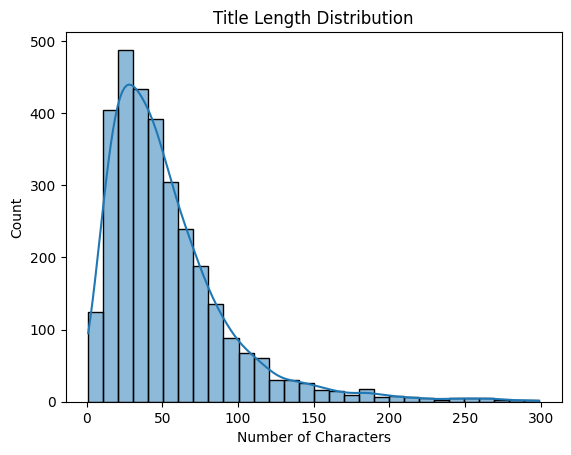

In [ ]:
reddit_combo['text_length'] = reddit_combo['title'].apply(len)
sns.histplot(reddit_combo['text_length'], bins=30, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

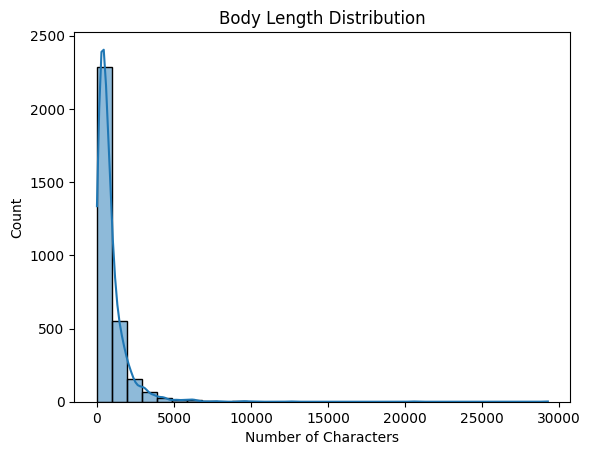

In [ ]:
reddit_combo['text_length'] = reddit_combo['body'].apply(len)
sns.histplot(reddit_combo['text_length'], bins=30, kde=True)
plt.title("Body Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

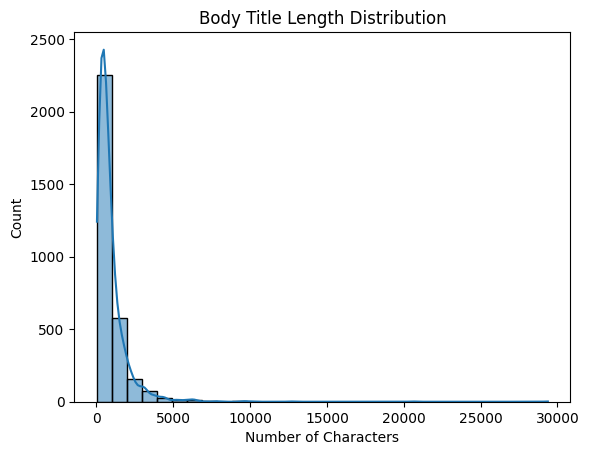

In [ ]:
reddit_combo['text_length'] = reddit_combo['Body_Title'].apply(len)
sns.histplot(reddit_combo['text_length'], bins=30, kde=True)
plt.title("Body Title Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [ ]:
stress_text = " ".join(reddit_combo[reddit_combo['label'] == 1]['title'])
nonstress_text = " ".join(reddit_combo[reddit_combo['label'] == 0]['title'])

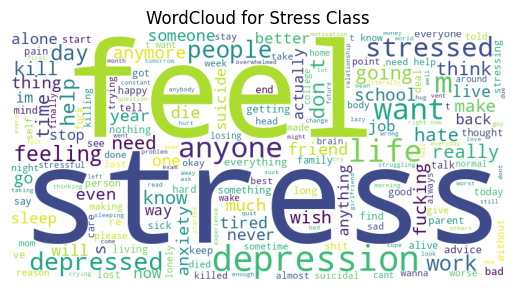

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(stress_text)
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud for Stress Class")
plt.show()

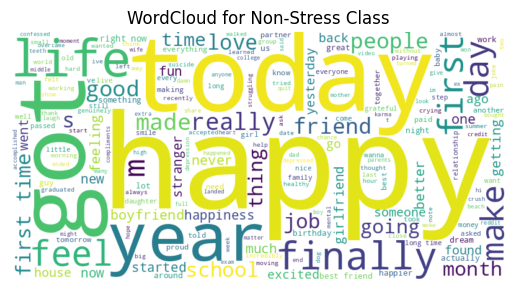

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(nonstress_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Non-Stress Class")
plt.show()

In [ ]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
reddit_combo.head() # printing the first five rows of the dataset

,title,body,Body_Title,label,text_length
0,envy to other is swallowing me,"im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.","envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta the ordinary. paradise. job stress. life stress. (f bombs call_me_hand_medium-light_skin_tone beyond this point) read on,"um hello ....well many can relate im sure. after today i’m convinced i’m a misanthrope. kinda ironic cause here i go again trying to get support from others. i’m on my way to being a “construction specialist” really i’m just an asskisser. i’m below everyone. no one respects me because they think i’m doing better than they are when really i respect everyone even though i know 100% they’re doing a lot better than me. one more loose screw right there. i mean fuck me, man. i mean i’m not getting paid that much. i drive a company vehicle. i work hard. very very hard. i’m being micromanaged. i’m in charge of a lot of people and projects but as far as work...i think we kinda get in the way of trades doing the actual work. i hate this business. im sure i’m”add” but nobody cares. it’s still my fault i mess up. people are like crabs in a bucket. i just told the painter to fuck off. i told an old guy in the parking lot to fuck off. recently ive moved states. been 8 months. i can’t or don’t get a new state license so i can actually move forward. i work too much. my car is in need of repair. i bought a motorcycle which i can’t ride legally. i’m living in a house that isn’t mine. i’m staying in a nice place with an awesome view by myself. house sitting and paying them a decent amount of rent while the owners are outta town...that’s about to end in a few weeks. hard to keep up. social life is super super la

In [ ]:
reddit_combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116 entries, 0 to 3122
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3116 non-null   object
 1   body         3116 non-null   object
 2   Body_Title   3116 non-null   object
 3   label        3116 non-null   int64 
 4   text_length  3116 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 146.1+ KB


In [ ]:
reddit_combo.isnull().sum() # checking for the null values

,0
title,0
body,0
Body_Title,0
label,0
text_length,0


In [ ]:
reddit_combo= reddit_combo.dropna() # Removing the null values

In [ ]:
reddit_combo.isnull().sum() # After removing again checking for the null values

,0
title,0
body,0
Body_Title,0
label,0
text_length,0


In [ ]:
reddit_combo.duplicated().sum()

np.int64(0)

In [ ]:
reddit_combo['label'].value_counts()

,count
label,
1,2741
0,375


In [ ]:
reddit_combo['label'].value_counts(normalize=True) * 100

,proportion
label,
1,87.96534
0,12.03466


In [ ]:
reddit_combo['title']=reddit_combo['title'].str.lower()
reddit_combo['body']=reddit_combo['body'].str.lower()
reddit_combo['Body_Title']=reddit_combo['Body_Title'].str.lower()

In [ ]:
reddit_combo['title']=reddit_combo['title'].str.replace(r'\d+', '', regex=True) #remove numbers
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy to other is swallowing me,"im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.","envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta the ordinary. paradise. job stress. life stress. (f bombs call_me_hand_medium-light_skin_tone beyond this point) read on,"um hello ....well many can relate im sure. after today i’m convinced i’m a misanthrope. kinda ironic cause here i go again trying to get support from others. i’m on my way to being a “construction specialist” really i’m just an asskisser. i’m below everyone. no one respects me because they think i’m doing better than they are when really i respect everyone even though i know 100% they’re doing a lot better than me. one more loose screw right there. i mean fuck me, man. i mean i’m not getting paid that much. i drive a company vehicle. i work hard. very very hard. i’m being micromanaged. i’m in charge of a lot of people and projects but as far as work...i think we kinda get in the way of trades doing the actual work. i hate this business. im sure i’m”add” but nobody cares. it’s still my fault i mess up. people are like crabs in a bucket. i just told the painter to fuck off. i told an old guy in the parking lot to fuck off. recently ive moved states. been 8 months. i can’t or don’t get a new state license so i can actually move forward. i work too much. my car is in need of repair. i bought a motorcycle which i can’t ride legally. i’m living in a house that isn’t mine. i’m staying in a nice place with an awesome view by myself. house sitting and paying them a decent amount of rent while the owners are outta town...that’s about to end in a few weeks. hard to keep up. social life is super super la

In [ ]:
reddit_combo['title'] = reddit_combo['title'].str.replace(r'[^\w\s]', '', regex=True) # removes punctuation
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy to other is swallowing me,"im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.","envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta the ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond this point read on,"um hello ....well many can relate im sure. after today i’m convinced i’m a misanthrope. kinda ironic cause here i go again trying to get support from others. i’m on my way to being a “construction specialist” really i’m just an asskisser. i’m below everyone. no one respects me because they think i’m doing better than they are when really i respect everyone even though i know 100% they’re doing a lot better than me. one more loose screw right there. i mean fuck me, man. i mean i’m not getting paid that much. i drive a company vehicle. i work hard. very very hard. i’m being micromanaged. i’m in charge of a lot of people and projects but as far as work...i think we kinda get in the way of trades doing the actual work. i hate this business. im sure i’m”add” but nobody cares. it’s still my fault i mess up. people are like crabs in a bucket. i just told the painter to fuck off. i told an old guy in the parking lot to fuck off. recently ive moved states. been 8 months. i can’t or don’t get a new state license so i can actually move forward. i work too much. my car is in need of repair. i bought a motorcycle which i can’t ride legally. i’m living in a house that isn’t mine. i’m staying in a nice place with an awesome view by myself. house sitting and paying them a decent amount of rent while the owners are outta town...that’s about to end in a few weeks. hard to keep up. social life is super super lacking a

In [ ]:
reddit_combo['title'] = reddit_combo['title'].apply(word_tokenize)

In [ ]:
reddit_combo['title'] = reddit_combo['title'].apply(word_tokenize)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
def removestopwords(tokens):
    return [w for w in tokens if w.lower() not in stop_words]

reddit_combo['title'] = reddit_combo['title'].apply(removestopwords)

In [ ]:
reddit_combo['title'] = reddit_combo['title'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy swallowing,"im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.","envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond point read,"um hello ....well many can relate im sure. after today i’m convinced i’m a misanthrope. kinda ironic cause here i go again trying to get support from others. i’m on my way to being a “construction specialist” really i’m just an asskisser. i’m below everyone. no one respects me because they think i’m doing better than they are when really i respect everyone even though i know 100% they’re doing a lot better than me. one more loose screw right there. i mean fuck me, man. i mean i’m not getting paid that much. i drive a company vehicle. i work hard. very very hard. i’m being micromanaged. i’m in charge of a lot of people and projects but as far as work...i think we kinda get in the way of trades doing the actual work. i hate this business. im sure i’m”add” but nobody cares. it’s still my fault i mess up. people are like crabs in a bucket. i just told the painter to fuck off. i told an old guy in the parking lot to fuck off. recently ive moved states. been 8 months. i can’t or don’t get a new state license so i can actually move forward. i work too much. my car is in need of repair. i bought a motorcycle which i can’t ride legally. i’m living in a house that isn’t mine. i’m staying in a nice place with an awesome view by myself. house sitting and paying them a decent amount of rent while the owners are outta town...that’s about to end in a few weeks. hard to keep up. social life is super super lacking and dull of course. . first 

In [ ]:
reddit_combo['body']=reddit_combo['body'].str.replace(r'\d+', '', regex=True) #remove numbers
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy swallowing,"im from developingcountry, indonesia , and for now i temporary work overseas for years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work - years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.","envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond point read,"um hello ....well many can relate im sure. after today i’m convinced i’m a misanthrope. kinda ironic cause here i go again trying to get support from others. i’m on my way to being a “construction specialist” really i’m just an asskisser. i’m below everyone. no one respects me because they think i’m doing better than they are when really i respect everyone even though i know % they’re doing a lot better than me. one more loose screw right there. i mean fuck me, man. i mean i’m not getting paid that much. i drive a company vehicle. i work hard. very very hard. i’m being micromanaged. i’m in charge of a lot of people and projects but as far as work...i think we kinda get in the way of trades doing the actual work. i hate this business. im sure i’m”add” but nobody cares. it’s still my fault i mess up. people are like crabs in a bucket. i just told the painter to fuck off. i told an old guy in the parking lot to fuck off. recently ive moved states. been months. i can’t or don’t get a new state license so i can actually move forward. i work too much. my car is in need of repair. i bought a motorcycle which i can’t ride legally. i’m living in a house that isn’t mine. i’m staying in a nice place with an awesome view by myself. house sitting and paying them a decent amount of rent while the owners are outta town...that’s about to end in a few weeks. hard to keep up. social life is super super lacking and dull of course. . first time moving a

In [ ]:
reddit_combo['body'] = reddit_combo['body'].str.replace(r'[^\w\s]', '', regex=True) # removes punctuation
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy swallowing,im from developingcountry indonesia and for now i temporary work overseas for years contract its a hard labor job and stressful next year my contract is finish but during my stay here because of job and my social life my depression got worse and i envy this developed country why this country is so good i can afford anything i want here why cant we just have equality in currency exchange i i need to work years in big company in jakartaour capital city just to get equal amount of saving money from what i got from years working here yes thats right its saving money not spending money and yes im going to be a rich person in such young age if i think about it this society is sick the gap of un equality beetwen developing vs developed country or the poor vs the rich is too big right now sorry if i look like an evil person but because of thisi almost wish for war to happen or this world to end and got reseted so everyone can have another chance to gain equality the poor can finally have a chance to have a better life because if this world order stay this way it will eventually collapse on itself soon,"envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond point read,um hello well many can relate im sure after today im convinced im a misanthrope kinda ironic cause here i go again trying to get support from others im on my way to being a construction specialist really im just an asskisser im below everyone no one respects me because they think im doing better than they are when really i respect everyone even though i know theyre doing a lot better than me one more loose screw right there i mean fuck me man i mean im not getting paid that much i drive a company vehicle i work hard very very hard im being micromanaged im in charge of a lot of people and projects but as far as worki think we kinda get in the way of trades doing the actual work i hate this business im sure imadd but nobody cares its still my fault i mess up people are like crabs in a bucket i just told the painter to fuck off i told an old guy in the parking lot to fuck off recently ive moved states been months i cant or dont get a new state license so i can actually move forward i work too much my car is in need of repair i bought a motorcycle which i cant ride legally im living in a house that isnt mine im staying in a nice place with an awesome view by myself house sitting and paying them a decent amount of rent while the owners are outta townthats about to end in a few weeks hard to keep up social life is super super lacking and dull of course first time moving away on my own sucks when everyone is telling me what to do and i do it theres a lot going on exact words to the painter

In [ ]:
reddit_combo['body'] = reddit_combo['body'].apply(word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
def removestopwords(tokens):
    return [w for w in tokens if w.lower() not in stop_words]
reddit_combo['body'] = reddit_combo['body'].apply(removestopwords)

In [ ]:
reddit_combo['body'] = reddit_combo['body'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy swallowing,im developingcountry indonesia temporary work overseas years contract hard labor job stressful next year contract finish stay job social life depression got worse envy developed country country good afford anything want cant equality currency exchange need work years big company jakartaour capital city get equal amount saving money got years working yes thats right saving money spending money yes im going rich person young age think society sick gap un equality beetwen developing vs developed country poor vs rich big right sorry look like evil person thisi almost wish war happen world end got reseted everyone another chance gain equality poor finally chance better life world order stay way eventually collapse soon,"envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond point read,um hello well many relate im sure today im convinced im misanthrope kinda ironic cause go trying get support others im way construction specialist really im asskisser im everyone one respects think im better really respect everyone even though know theyre lot better one loose screw right mean fuck man mean im getting paid much drive company vehicle work hard hard im micromanaged im charge lot people projects far worki think kinda get way trades actual work hate business im sure imadd nobody cares still fault mess people like crabs bucket told painter fuck told old guy parking lot fuck recently ive moved states months cant dont get new state license actually move forward work much car need repair bought motorcycle cant ride legally im living house isnt mine im staying nice place awesome view house sitting paying decent amount rent owners outta townthats end weeks hard keep social life super super lacking dull course first time moving away sucks everyone telling theres lot going exact words painter complaining handy work since jobnot specialty blatantly spelled themis ironic considering soon former position exact words quite franklyi dont give fuck im close shook head understood right away either mental breakdown burnt needed shut trap shoved paintbrush sun dont shine old man driving expired plates side work weekend couldnt drive work truck company logo cant even flip people anymore explained guy working hour weeks none stop happened work couldnt refuse right weekend risk going vehicle ive pissed retirees lately since ive done lotta work nice area usually respect get fed sucking people act like toddlers took phone take pic license plate got asked retired said yeah looked eye said fuck go find something better eventually left saying good day im fuckin done people world dont know gon na go ever narrowing tunnel us mean add lostspent savings far much much needed poin

In [ ]:
reddit_combo['Body_Title']=reddit_combo['Body_Title'].str.replace(r'\d+', '', regex=True) #remove numbers
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy swallowing,im developingcountry indonesia temporary work overseas years contract hard labor job stressful next year contract finish stay job social life depression got worse envy developed country country good afford anything want cant equality currency exchange need work years big company jakartaour capital city get equal amount saving money got years working yes thats right saving money spending money yes im going rich person young age think society sick gap un equality beetwen developing vs developed country poor vs rich big right sorry look like evil person thisi almost wish war happen world end got reseted everyone another chance gain equality poor finally chance better life world order stay way eventually collapse soon,"envy to other is swallowing me im from developingcountry, indonesia , and for now i temporary work overseas for years contract, it's a hard labor job, and stressful. next year my contract is finish. but, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. why this country is so good. i can afford anything i want here. why can't we just have equality in currency exchange? i i need to work - years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from years working here. yes, that's right, it's saving money, not spending money. and yes, im going to be a rich person in such young age if i think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. sorry if i look like an evil person , but because of this,i almost wish for war to happen, or this world to end, and got reseted. so everyone can have another chance to gain equality, the poor can finally have a chance to have a better life. because if this world order stay this way, it will eventually collapse on itself. soon.",1,1196
1,nothin outta ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond point read,um hello well many relate im sure today im convinced im misanthrope kinda ironic cause go trying get support others im way construction specialist really im asskisser im everyone one respects think im better really respect everyone even though know theyre lot better one loose screw right mean fuck man mean im getting paid much drive company vehicle work hard hard im micromanaged im charge lot people projects far worki think kinda get way trades actual work hate business im sure imadd nobody cares still fault mess people like crabs bucket told painter fuck told old guy parking lot fuck recently ive moved states months cant dont get new state license actually move forward work much car need repair bought motorcycle cant ride legally im living house isnt mine im staying nice place awesome view house sitting paying decent amount rent owners outta townthats end weeks hard keep social life super super lacking dull course first time moving away sucks everyone telling theres lot going exact words painter complaining handy work since jobnot specialty blatantly spelled themis ironic considering soon former position exact words quite franklyi dont give fuck im close shook head understood right away either mental breakdown burnt needed shut trap shoved paintbrush sun dont shine old man driving expired plates side work weekend couldnt drive work truck company logo cant even flip people anymore explained guy working hour weeks none stop happened work couldnt refuse right weekend risk going vehicle ive pissed retirees lately since ive done lotta work nice area usually respect get fed sucking people act like toddlers took phone take pic license plate got asked retired said yeah looked eye said fuck go find something better eventually left saying good day im fuckin done people world dont know gon na go ever narrowing tunnel us mean add lostspent savings far much much needed point grand 

In [ ]:
reddit_combo['Body_Title'] = reddit_combo['Body_Title'].str.replace(r'[^\w\s]', '', regex=True) # removes punctuation
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy swallowing,im developingcountry indonesia temporary work overseas years contract hard labor job stressful next year contract finish stay job social life depression got worse envy developed country country good afford anything want cant equality currency exchange need work years big company jakartaour capital city get equal amount saving money got years working yes thats right saving money spending money yes im going rich person young age think society sick gap un equality beetwen developing vs developed country poor vs rich big right sorry look like evil person thisi almost wish war happen world end got reseted everyone another chance gain equality poor finally chance better life world order stay way eventually collapse soon,envy to other is swallowing me im from developingcountry indonesia and for now i temporary work overseas for years contract its a hard labor job and stressful next year my contract is finish but during my stay here because of job and my social life my depression got worse and i envy this developed country why this country is so good i can afford anything i want here why cant we just have equality in currency exchange i i need to work years in big company in jakartaour capital city just to get equal amount of saving money from what i got from years working here yes thats right its saving money not spending money and yes im going to be a rich person in such young age if i think about it this society is sick the gap of un equality beetwen developing vs developed country or the poor vs the rich is too big right now sorry if i look like an evil person but because of thisi almost wish for war to happen or this world to end and got reseted so everyone can have another chance to gain equality the poor can finally have a chance to have a better life because if this world order stay this way it will eventually collapse on itself soon,1,1196
1,nothin outta ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond point read,um hello well many relate im sure today im convinced im misanthrope kinda ironic cause go trying get support others im way construction specialist really im asskisser im everyone one respects think im better really respect everyone even though know theyre lot better one loose screw right mean fuck man mean im getting paid much drive company vehicle work hard hard im micromanaged im charge lot people projects far worki think kinda get way trades actual work hate business im sure imadd nobody cares still fault mess people like crabs bucket told painter fuck told old guy parking lot fuck recently ive moved states months cant dont get new state license actually move forward work much car need repair bought motorcycle cant ride legally im living house isnt mine im staying nice place awesome view house sitting paying decent amount rent owners outta townthats end weeks hard keep social life super super lacking dull course first time moving away sucks everyone telling theres lot going exact words painter complaining handy work since jobnot specialty blatantly spelled themis ironic considering soon former position exact words quite franklyi dont give fuck im close shook head understood right away either mental breakdown burnt needed shut trap shoved paintbrush sun dont shine old man driving expired plates side work weekend couldnt drive work truck company logo cant even flip people anymore explained guy working hour weeks none stop happened work couldnt refuse right weekend risk going vehicle ive pissed retirees lately since ive done lotta work nice area usually respect get fed sucking people act like toddlers took phone take pic license plate got asked retired said yeah looked eye said fuck go find something better eventually left saying good day im fuckin done people world dont know gon na go ever narrowing tunnel us mean add lostspent savings far much much needed point grand fuckin online dating scammers complete incompeten

In [ ]:
reddit_combo['Body_Title'] = reddit_combo['Body_Title'].apply(word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
def removestopwords(tokens):
    return [w for w in tokens if w.lower() not in stop_words]
reddit_combo['Body_Title'] = reddit_combo['Body_Title'].apply(removestopwords)

In [ ]:
reddit_combo['Body_Title'] = reddit_combo['Body_Title'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
reddit_combo.head(10)

,title,body,Body_Title,label,text_length
0,envy swallowing,im developingcountry indonesia temporary work overseas years contract hard labor job stressful next year contract finish stay job social life depression got worse envy developed country country good afford anything want cant equality currency exchange need work years big company jakartaour capital city get equal amount saving money got years working yes thats right saving money spending money yes im going rich person young age think society sick gap un equality beetwen developing vs developed country poor vs rich big right sorry look like evil person thisi almost wish war happen world end got reseted everyone another chance gain equality poor finally chance better life world order stay way eventually collapse soon,envy swallowing im developingcountry indonesia temporary work overseas years contract hard labor job stressful next year contract finish stay job social life depression got worse envy developed country country good afford anything want cant equality currency exchange need work years big company jakartaour capital city get equal amount saving money got years working yes thats right saving money spending money yes im going rich person young age think society sick gap un equality beetwen developing vs developed country poor vs rich big right sorry look like evil person thisi almost wish war happen world end got reseted everyone another chance gain equality poor finally chance better life world order stay way eventually collapse soon,1,1196
1,nothin outta ordinary paradise job stress life stress f bombs call_me_hand_mediumlight_skin_tone beyond point read,um hello well many relate im sure today im convinced im misanthrope kinda ironic cause go trying get support others im way construction specialist really im asskisser im everyone one respects think im better really respect everyone even though know theyre lot better one loose screw right mean fuck man mean im getting paid much drive company vehicle work hard hard im micromanaged im charge lot people projects far worki think kinda get way trades actual work hate business im sure imadd nobody cares still fault mess people like crabs bucket told painter fuck told old guy parking lot fuck recently ive moved states months cant dont get new state license actually move forward work much car need repair bought motorcycle cant ride legally im living house isnt mine im staying nice place awesome view house sitting paying decent amount rent owners outta townthats end weeks hard keep social life super super lacking dull course first time moving away sucks everyone telling theres lot going exact words painter complaining handy work since jobnot specialty blatantly spelled themis ironic considering soon former position exact words quite franklyi dont give fuck im close shook head understood right away either mental breakdown burnt needed shut trap shoved paintbrush sun dont shine old man driving expired plates side work weekend couldnt drive work truck company logo cant even flip people anymore explained guy working hour weeks none stop happened work couldnt refuse right weekend risk going vehicle ive pissed retirees lately since ive done lotta work nice area usually respect get fed sucking people act like toddlers took phone take pic license plate got asked retired said yeah looked eye said fuck go find something better eventually left saying good day im fuckin done people world dont know gon na go ever narrowing tunnel us mean add lostspent savings far much much needed point grand fuckin online dating scammers complete incompetencedesperation part yeah dont know gooptions endless keep thinking giant meteor would simplify quite nicely dont dont expect anyone actually read way even give shit expect type hopefully someone relates even chuckles like yeah thats dont care got ta know someone else read potentially understand let sit stew inside im venting say hello internet im fucking lose,nothin outta ordinary paradise job stress

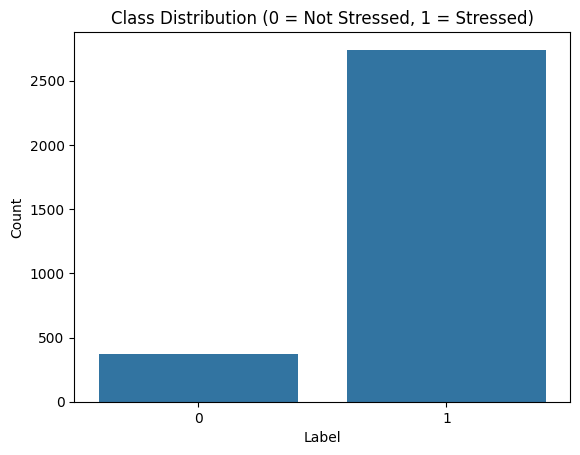

In [ ]:
# Class distribution
sns.countplot(x='label', data=reddit_combo)
plt.title("Class Distribution (0 = Not Stressed, 1 = Stressed)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

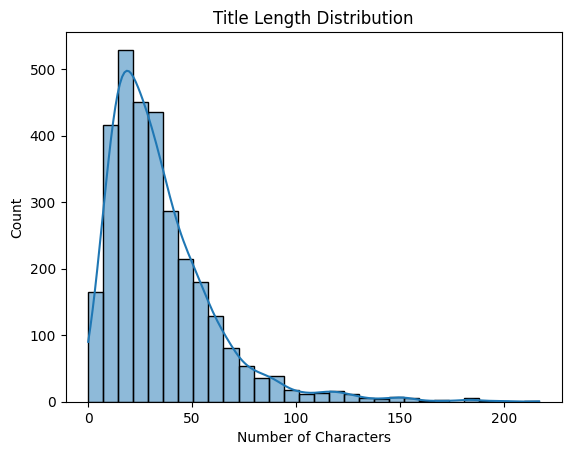

In [ ]:
# Title length distribution
reddit_combo['text_length'] = reddit_combo['title'].apply(len)
sns.histplot(reddit_combo['text_length'], bins=30, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

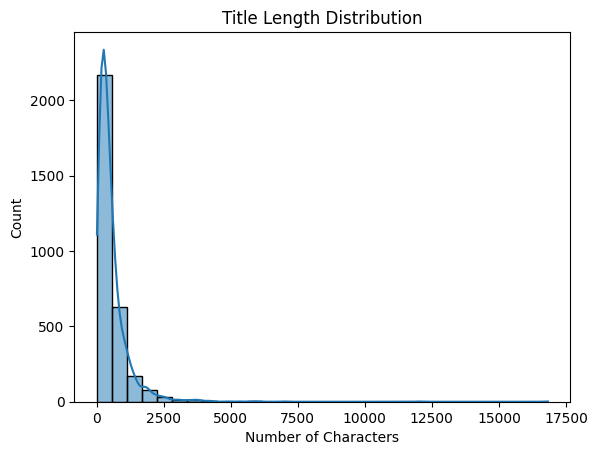

In [ ]:
# Title length distribution
reddit_combo['text_length'] = reddit_combo['Body_Title'].apply(len)
sns.histplot(reddit_combo['text_length'], bins=30, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

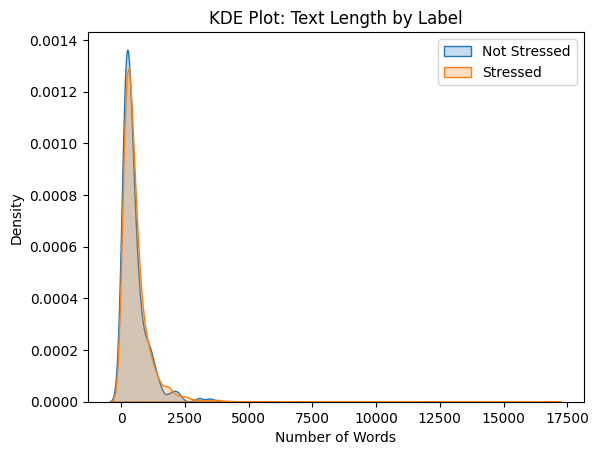

In [ ]:
sns.kdeplot(reddit_combo[reddit_combo["label"] == 0]["text_length"], label="Not Stressed", fill=True)
sns.kdeplot(reddit_combo[reddit_combo["label"] == 1]["text_length"], label="Stressed", fill=True)
plt.title("KDE Plot: Text Length by Label")
plt.xlabel("Number of Words")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(reddit_combo, test_size=0.2)

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples['title'], truncation=True, padding=True, max_length=512)

# Convert pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/2492 [00:00<?, ? examples/s]

Map:   0%|          | 0/624 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipython-input-966030080.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.343000,0.231890
2,0.190200,0.200853
3,0.139100,0.203057


TrainOutput(global_step=234, training_loss=0.22408055036495894, metrics={'train_runtime': 37.351, 'train_samples_per_second': 200.155, 'train_steps_per_second': 6.265, 'total_flos': 71566547025456.0, 'train_loss': 0.22408055036495894, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(f"Evaluation Results: {results}")

Evaluation Results: {'eval_loss': 0.20305684208869934, 'eval_runtime': 0.5977, 'eval_samples_per_second': 1044.057, 'eval_steps_per_second': 33.463, 'epoch': 3.0}


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (logits) from the trainer on test dataset
predictions_output = trainer.predict(tokenized_test)

# predictions_output.predictions are logits; get predicted classes by taking argmax
y_pred = np.argmax(predictions_output.predictions, axis=1)

# True labels
y_true = predictions_output.label_ids

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 42  30]
 [ 17 535]]


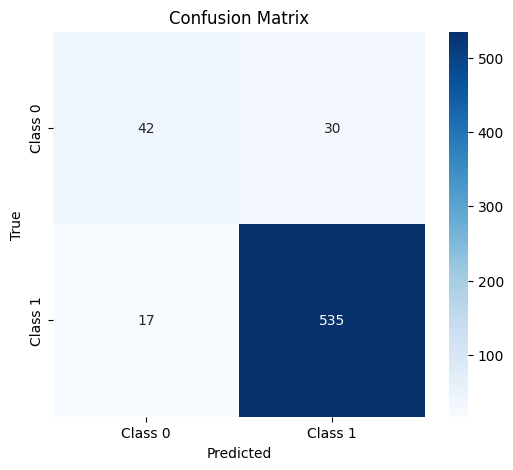

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples['Body_Title'], truncation=True, padding=True, max_length=512)

# Convert pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2492 [00:00<?, ? examples/s]

Map:   0%|          | 0/624 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipython-input-966030080.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.313100,0.193678
2,0.148200,0.136088
3,0.105000,0.134044


TrainOutput(global_step=234, training_loss=0.18878500685732588, metrics={'train_runtime': 376.5797, 'train_samples_per_second': 19.852, 'train_steps_per_second': 0.621, 'total_flos': 990326272352256.0, 'train_loss': 0.18878500685732588, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(f"Evaluation Results: {results}")

Evaluation Results: {'eval_loss': 0.1340436041355133, 'eval_runtime': 9.4702, 'eval_samples_per_second': 65.891, 'eval_steps_per_second': 2.112, 'epoch': 3.0}


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (logits) from the trainer on test dataset
predictions_output = trainer.predict(tokenized_test)

# predictions_output.predictions are logits; get predicted classes by taking argmax
y_pred = np.argmax(predictions_output.predictions, axis=1)

# True labels
y_true = predictions_output.label_ids

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 60  12]
 [ 14 538]]


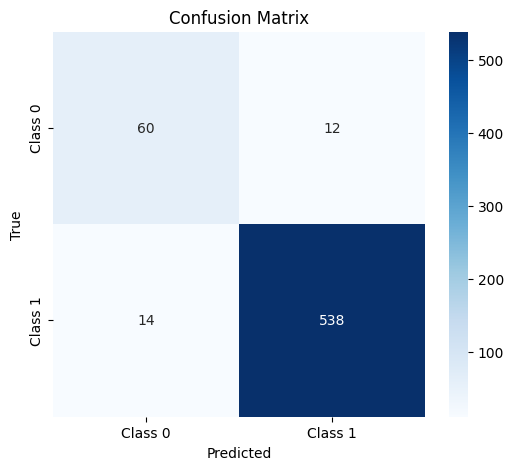

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
